In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\data set\transactions.csv',index_col='date')
df.head()

,store_nbr,transactions
date,,
2013-01-01,25,770
2013-01-02,1,2111
2013-01-02,2,2358
2013-01-02,3,3487
2013-01-02,4,1922


In [3]:
df.shape

(83488, 2)

In [4]:
df.isna().sum()

store_nbr       0
transactions    0
dtype: int64

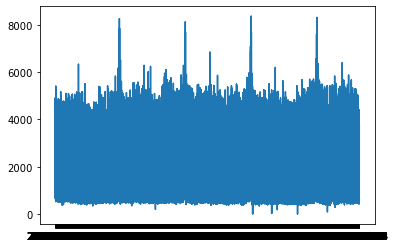

In [24]:
ts = df['transactions']
plt.plot(ts)

In [30]:
def test_stationary(timeseries):
    rollmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    orig = plt.plot(timeseries,color='blue',label='Original')
    mean = plt.plot(timeseries,color='r',label='mean')
    std = plt.plot(timeseries,color='blue',label='std')
    plt.title('Rolling the graph')
    plt.show()
    
     #dickey fuller test
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

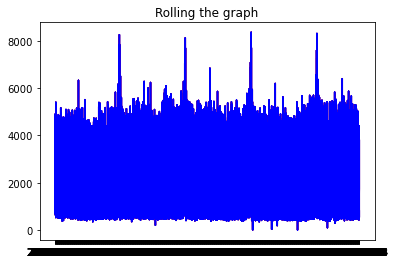

Results of Dickey-Fuller Test:
Test Statistic                -1.657422e+01
p-value                        1.858614e-29
#Lags Used                     6.400000e+01
Number of Observations Used    8.342300e+04
Critical Value (1%)           -3.430428e+00
Critical Value (5%)           -2.861575e+00
Critical Value (10%)          -2.566788e+00
dtype: float64


In [31]:
test_stationary(ts)

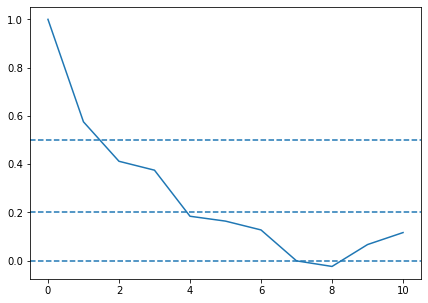

In [27]:
plt.figure(figsize=(7,5))
plt.plot(range(0,11),acf(ts , nlags=10))
plt.axhline(y=0.2, linestyle='--')
plt.axhline(y=0.5,linestyle='--')
plt.axhline(y=0,linestyle='--')

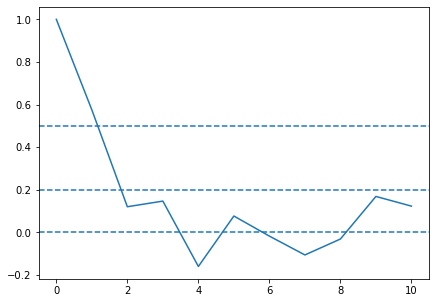

In [28]:
plt.figure(figsize=(7,5))
plt.plot(range(0,11),pacf(ts , nlags=10))
plt.axhline(y=0.2, linestyle='--')
plt.axhline(y=0.5,linestyle='--')
plt.axhline(y=0,linestyle='--')

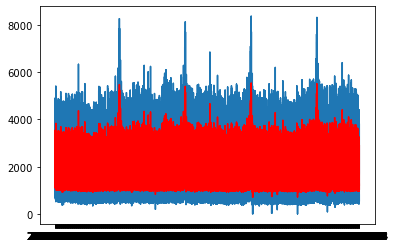

In [29]:
model = ARMA(ts,order=(1,0)).fit()

plt.plot(ts)
plt.plot(model.fittedvalues,color='r')